## Install required package

In [ ]:
!pip install -U -r qiskit==0.19

# Single-qubit circuits

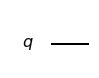

In [1]:
from qiskit import QuantumCircuit

mycircuit = QuantumCircuit(1)
mycircuit.draw('mpl')

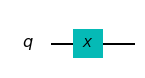

In [2]:
mycircuit.x(0)
mycircuit.draw('mpl')

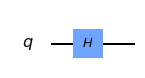

In [3]:
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.draw('mpl')

# Multi-qubit circuits

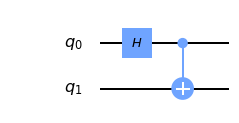

In [13]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

# Visualizing states on Q-sphere
## Measurements by sampling counts from state vectors

In [7]:
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector

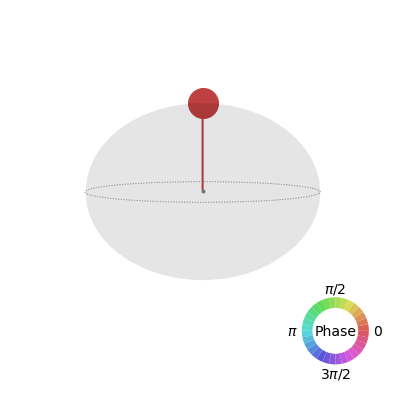

In [17]:
sv = Statevector.from_label('00')
plot_state_qsphere(sv.data)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


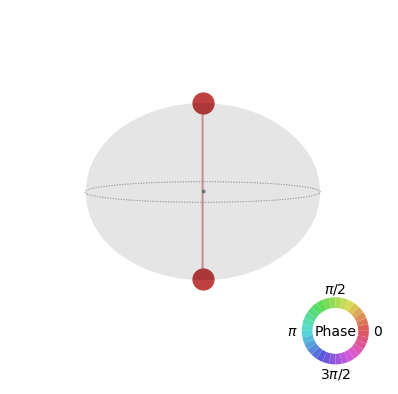

In [18]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

## Measurements within the circuit

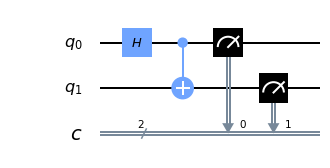

In [19]:
mycircuit = QuantumCircuit(2, 2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.measure([0,1], [0,1])
mycircuit.draw('mpl')

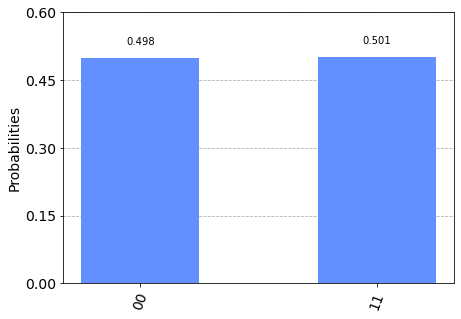

In [21]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, simulator, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)

---

# Using the real Quantum Computer

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('MY_API_TOKEN')

In [1]:
from qiskit import IBMQ

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_16_melbourne')

In [2]:
import qiskit.tools.jupyter
%matplotlib inline

backend

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

---